In this Notebook we will obtain the distribution of radius of gyration of the models. This gives an idea of how open or close is the reconstructed conformation as compared between the different cells

# Libraries and functions 

In [1]:
from pytadbit.modelling.structuralmodels import load_structuralmodels
import cPickle as pickle
import matplotlib.backends.backend_pdf
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
import numpy as np


# Parameters to modify 

In [2]:
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/TADdyn_tutorial/'
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# Define the orther of the cells for the ploting
orderCell = ['Ery', 'nCD4', 'Mon']
# Define the coloring options for each cell
colors = [(120/255., 94/255., 240/255.), 
          (254/255., 97/255., 0/255.),
          (220/255., 38/255., 127/255.)
         ]
# Wether to store figures in pdf or not
saveFig = False

# To run 

## Import additional libraries 

In [3]:
sys.path.append(basePath + 'code')
import fileHandling
import metrics

## Define new paths 

In [4]:
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/metrics/'

## Get model files and regions 

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')
                
## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

# Gyration radius in all models 

In [6]:
models

{'Ery': {'b-globin': '/home/julen/TADdyn/TADdyn_tutorial/models/Ery/b-globin/Ery_b-globin_C200.0L0.0U0.0M300Res5000.models'},
 'Mon': {'b-globin': '/home/julen/TADdyn/TADdyn_tutorial/models/Mon/b-globin/Mon_b-globin_C200.0L-0.5U0.0M300Res5000.models'},
 'nCD4': {'b-globin': '/home/julen/TADdyn/TADdyn_tutorial/models/nCD4/b-globin/nCD4_b-globin_C200.0L0.0U0.0M300Res5000.models'}}

In [7]:
allRadius = {}
for cell in sorted(models):
    allRadius[cell] = {}
    for regi in models[cell]:
        mo = models[cell][regi]
        mods = load_structuralmodels(mo)
        # keep the amount of selected models
        mods.define_best_models(modelsKeep)
        allR = []
        for mo1 in mods:
            r = metrics.radius_of_gyration(mo1)
            allR.append(r)
        id0 = mo.split('/')[-1].split('_')[1]
        allRadius[cell][id0] = allR

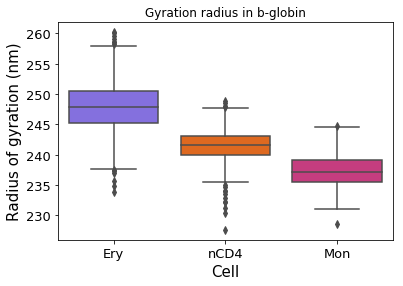

In [8]:


if saveFig == True:
    pdf = matplotlib.backends.backend_pdf.PdfPages(outplot + 'gyrationRadiuses.pdf')

for regi in regionsAll:
    x = []
    y = []
    for expe in orderCell:
        y += allRadius[expe][regi]
        x += [expe] * len(allRadius[expe][regi])
        
    pd_dat = pd.DataFrame(
                {'Gyration radius':y,
                'Experiment': x})

    fig = plt.figure()
    ax = sns.boxplot(x='Experiment', y='Gyration radius', data=pd_dat, order=orderCell,palette=colors)
    #plt.plot(x, y, 'o', color='red')
    plt.title('Gyration radius in %s' %regi)
    #plt.ylim(145, 250)
    #plt.axhline(0)
    plt.ylabel('Radius of gyration (nm)', size=15)
    plt.xlabel('Cell', size=15)
    plt.xticks(rotation=0, size=13)
    plt.yticks(size=13)

    if saveFig == True:
        pdf.savefig( fig , bbox_inches='tight')
    plt.show()

if saveFig == True:
    pdf.close()

In [9]:
combis = itertools.combinations(cells, 2)
for expe1, expe2 in combis:
    print expe1, expe2, stats.ks_2samp(allRadius[expe1][regi], allRadius[expe2][regi])
    
for expe in cells:
    print expe, np.median(allRadius[expe][regi]), metrics.median_absolute_deviation(allRadius[expe][regi])

Ery Mon Ks_2sampResult(statistic=0.889, pvalue=0.0)
Ery nCD4 Ks_2sampResult(statistic=0.7040000000000001, pvalue=4.426677365602397e-218)
Mon nCD4 Ks_2sampResult(statistic=0.608, pvalue=9.103670491916157e-163)
Ery 247.80611073506333 2.6153250712796847
Mon 237.22575620788024 1.8375841564062227
nCD4 241.59292530979457 1.5726104584342266
